In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame
df = pd.DataFrame({
    'Year': [2018,2018,2019,2019],
    'Month': [1,1,3,4],
     'X': ['x','y','t','u']
})
df


,Year,Month,X
0,2018,1,x
1,2018,1,y
2,2019,3,t
3,2019,4,u


In [9]:
# 将年份和月份转换为字符串格式，以便进行分组
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)

# 按年份和月份分组，并计算每组中 x 的数量
grouped = df.groupby(['Year', 'Month'])['X'].count().reset_index(name='Count')

grouped['Month'] = grouped['Month'].astype(int)

# 将月份转换为整数类型，并创建一个分类类型，以便按月份排序
grouped['Month'] = pd.Categorical(grouped['Month'], categories=range(1, 13), ordered=True)


grouped

,Year,Month,Count
0,2018,1,2
1,2019,3,1
2,2019,4,1


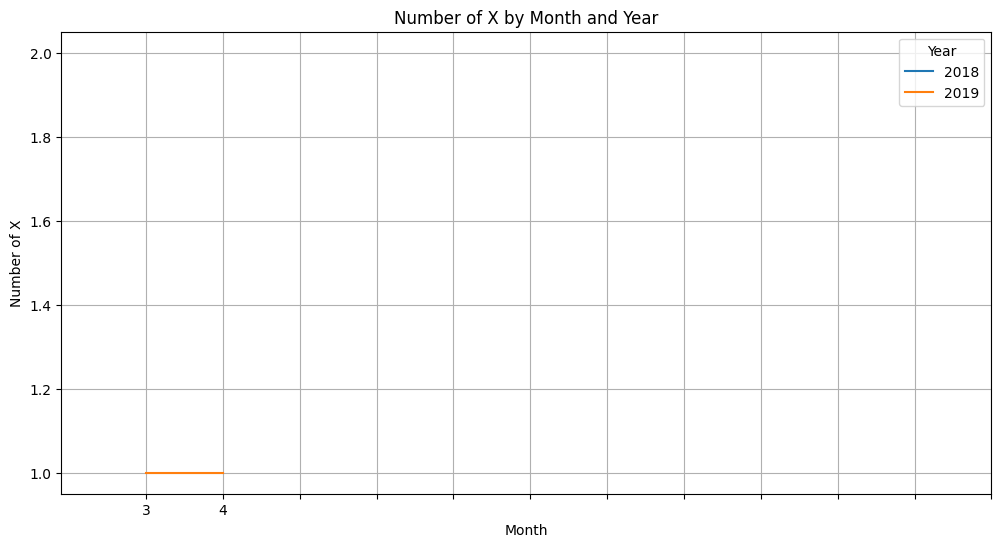

In [ ]:


# 绘制折线图
plt.figure(figsize=(12, 6))

# 为每年的数据绘制折线图
for year in grouped['Year'].unique():
    year_data = grouped[grouped['Year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Count', hue='Year', palette='tab10', marker='o', ci=None)

# 设置图表标题和标签
plt.title('Number of X by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of X')
plt.xticks(range(1, 13))  # 设置X轴刻度为1到12
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # 调整布局以适应图例
plt.show()